In [5]:
import networkx as nx
import os
import sys
import urllib
from sklearn.cluster import KMeans
from sknetwork.data import load_edge_list, load_graphml, load_netset, load_konect


In [6]:
url = '/Users/justindo/COMP790/cat.graphml'
graph1 = nx.read_graphml(url)

In [7]:
from IPython.display import SVG
import numpy as np
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.hierarchy import Paris, BiParis, cut_straight, dasgupta_score, tree_sampling_divergence
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph, svg_dendrogram

In [11]:
new_graph = nx.Graph()
for u, v in graph1.edges():
    if new_graph.has_edge(u, v):
        new_graph[u][v]['weight'] += 1
    else:
        new_graph.add_edge(u, v, weight=1)

In [12]:
adj_matrix = nx.to_numpy_array(new_graph) # convert to adj matrix
adj_matrix

array([[0., 2., 2., ..., 0., 0., 0.],
       [2., 0., 2., ..., 0., 0., 0.],
       [2., 2., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 0., ..., 2., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
paris = Paris()
dendrogram = paris.fit_transform(adj_matrix)

In [16]:
dendrogram

array([[4.80000000e+01, 5.80000000e+01, 1.84372259e-02, 2.00000000e+00],
       [6.50000000e+01, 5.60000000e+01, 2.19490793e-02, 3.00000000e+00],
       [6.40000000e+01, 3.70000000e+01, 2.23880591e-02, 2.00000000e+00],
       [5.00000000e+00, 1.30000000e+01, 2.37050048e-02, 2.00000000e+00],
       [2.20000000e+01, 9.00000000e+00, 2.61194011e-02, 2.00000000e+00],
       [5.50000000e+01, 6.60000000e+01, 2.91922748e-02, 4.00000000e+00],
       [7.00000000e+01, 2.70000000e+01, 4.06371505e-02, 5.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 4.10447735e-02, 2.00000000e+00],
       [5.70000000e+01, 4.70000000e+01, 5.03731329e-02, 2.00000000e+00],
       [7.00000000e+00, 7.20000000e+01, 5.13608437e-02, 3.00000000e+00],
       [5.90000000e+01, 4.90000000e+01, 5.31167738e-02, 2.00000000e+00],
       [7.10000000e+01, 2.60000000e+01, 5.42142207e-02, 6.00000000e+00],
       [6.00000000e+00, 7.40000000e+01, 5.76163326e-02, 4.00000000e+00],
       [6.00000000e+01, 7.50000000e+01, 5.79455655e

In [17]:
image = svg_dendrogram(dendrogram)

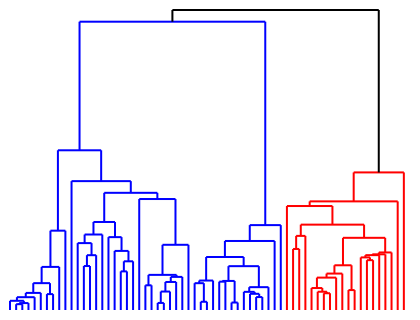

In [18]:
SVG(image)

In [19]:
from sknetwork.embedding import Spectral
graph = load_graphml(url)
adjacency = graph.adjacency
spectral = Spectral()
embedding = spectral.fit_transform(adj_matrix)
embedding.shape

(65, 2)

In [20]:
embedding

array([[ 0.01759577,  0.99984518],
       [ 0.04392782,  0.99903471],
       [ 0.11714819,  0.99311444],
       [ 0.0230149 ,  0.99973512],
       [-0.01999572,  0.99980007],
       [ 0.31111042,  0.95037377],
       [ 0.00200709,  0.99999799],
       [-0.0348261 ,  0.99939339],
       [-0.39138966,  0.92022504],
       [-0.03162022,  0.99949996],
       [ 0.43081995,  0.9024379 ],
       [ 0.06091763,  0.9981428 ],
       [-0.97582449,  0.21855563],
       [ 0.21829002,  0.97588394],
       [ 0.23413891,  0.97220315],
       [-0.4424093 ,  0.89681325],
       [ 0.99630613, -0.0858725 ],
       [ 0.95972226, -0.2809505 ],
       [ 0.93553677,  0.35322933],
       [ 0.99644899,  0.08419865],
       [-0.92038943, -0.39100294],
       [-0.88414051, -0.46722109],
       [-0.03913366,  0.99923398],
       [-0.12935062, -0.99159892],
       [-0.47302361, -0.88104975],
       [-0.97633214,  0.21627657],
       [-0.9573989 , -0.28876868],
       [-0.9647786 , -0.26306321],
       [ 0.95039859,

In [64]:
adjacency

<65x65 sparse matrix of type '<class 'numpy.bool_'>'
	with 1139 stored elements in Compressed Sparse Row format>

In [5]:
len(graph)

65

In [6]:
len(graph.edges())

1139

In [7]:
graph.edges()

OutEdgeView([('n0', 'n1'), ('n0', 'n2'), ('n0', 'n3'), ('n0', 'n4'), ('n0', 'n5'), ('n0', 'n9'), ('n0', 'n10'), ('n0', 'n11'), ('n1', 'n0'), ('n1', 'n2'), ('n1', 'n3'), ('n1', 'n4'), ('n1', 'n5'), ('n1', 'n7'), ('n1', 'n9'), ('n1', 'n10'), ('n1', 'n11'), ('n1', 'n14'), ('n2', 'n0'), ('n2', 'n1'), ('n2', 'n3'), ('n2', 'n4'), ('n2', 'n5'), ('n2', 'n6'), ('n2', 'n7'), ('n2', 'n9'), ('n2', 'n10'), ('n2', 'n11'), ('n2', 'n12'), ('n2', 'n13'), ('n2', 'n14'), ('n2', 'n16'), ('n2', 'n17'), ('n2', 'n40'), ('n2', 'n41'), ('n2', 'n42'), ('n3', 'n0'), ('n3', 'n1'), ('n3', 'n2'), ('n3', 'n4'), ('n3', 'n5'), ('n3', 'n7'), ('n3', 'n9'), ('n3', 'n10'), ('n3', 'n11'), ('n3', 'n15'), ('n3', 'n16'), ('n3', 'n17'), ('n3', 'n58'), ('n3', 'n59'), ('n4', 'n0'), ('n4', 'n1'), ('n4', 'n2'), ('n4', 'n3'), ('n4', 'n6'), ('n4', 'n8'), ('n4', 'n9'), ('n4', 'n11'), ('n4', 'n14'), ('n4', 'n15'), ('n4', 'n16'), ('n4', 'n17'), ('n4', 'n50'), ('n4', 'n51'), ('n4', 'n58'), ('n4', 'n59'), ('n5', 'n0'), ('n5', 'n1'), ('n5